## Step 1 Construct features using NLTK

In [84]:
import nltk
from nltk.corpus import stopwords
import string
import json

%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division

randomState = np.random.seed(2)


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1028.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [85]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [86]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [87]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [88]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [89]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [90]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [91]:
def getAverageSentenceLength(words_all, sents):
    
    return len(words_all)/len(sents)


In [92]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [93]:
def getNumberOfPronoun(words):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
         
    for p in pronouns:
        count += words.count(p)
    
    return count

In [94]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [95]:
def getNumberOfConjunction(words):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']

    for c in conjunctions:
        count += words.count(c)
    
    return count

In [96]:
def getNumberOfComma(text):
    return text.count(",")

def getNumberOfDots(text):
    return text.count(".")

def getNumberOfStringList(words, string_list):
    count = 0
    
    for c in string_list:
        count += words.count(c)
    
    return count

def getNumberOfThe(words):
    string_list = ['a', 'an', 'the']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIn(words):
    string_list = ['in', 'on', 'to', 'of']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIs(words):
    string_list = ['is', 'are', 'was', 'were']
    
    return getNumberOfStringList(words, string_list)


In [97]:
# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'filename': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': [], 'numberOfComma': [], 'numberOfDots': [],
                'numberOfThe': [], 'numberOfIn': [], 'numberOfIs': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['filename'].append(content['filename'])
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(words_all, sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(words_all)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(words_all)/normalizer)
    featureTable['numberOfComma'].append(getNumberOfComma(content['text'])/normalizer)
    featureTable['numberOfDots'].append(getNumberOfDots(content['text'])/normalizer)
    featureTable['numberOfThe'].append(getNumberOfThe(words_all)/normalizer)
    featureTable['numberOfIn'].append(getNumberOfIn(words_all)/normalizer)
    featureTable['numberOfIs'].append(getNumberOfIs(words_all)/normalizer)

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

218


,DisLegomena,HapaxLegomena,averageSentenceLength,filename,numberOfComma,numberOfConjunction,numberOfDots,numberOfIn,numberOfIs,numberOfPronoun,numberOfSentences,numberOfThe,numberUniqueWords
act,,,,,,,,,,,,,
LOVE'S LABOUR'S LOST ACT V.,0.025578,0.089181,10.085125,19.txt,0.077756,0.076562,0.083639,0.047915,0.017308,0.053884,1163,0.044590,0.148862
THE LIFE OF KING HENRY THE FIFTH ACT I.,0.038578,0.164650,24.943396,11.txt,0.073374,0.095562,0.036561,0.068079,0.013364,0.037821,159,0.053707,0.240797
THE TWO GENTLEMEN OF VERONA ACT II.,0.023506,0.091991,9.959538,36.txt,0.077481,0.089234,0.082995,0.039756,0.019588,0.061956,692,0.032937,0.147998
KING HENRY THE EIGHTH ACT IV.,0.039179,0.176306,14.684932,15.txt,0.089086,0.084888,0.056437,0.047575,0.021455,0.043377,146,0.037313,0.251866
SECOND PART OF KING HENRY IV ACT II.,0.023723,0.090692,9.724062,10.txt,0.074120,0.073893,0.077866,0.038706,0.012713,0.058002,906,0.043246,0.151986


In [98]:
# Filter out wierd acts, e.g. the beginning of a play

# df = df[df['averageSentenceLength'] < 30]

df.drop(["A MIDSUMMER NIGHT'S DREAM ACT1596","ALLS WELL THAT ENDS WELL ACT1603", "AS YOU LIKE IT ACT1601", 
              "CYMBELINE ACT1609","KING HENRY THE EIGHTH ACT1611","KING JOHN ACT1597","KING RICHARD III ACT1593",
             "KING RICHARD THE SECOND ACT1596", "LOVE'S LABOUR'S LOST ACT1595", "MEASURE FOR MEASURE ACT1605",
             "MUCH ADO ABOUT NOTHING ACT1599", "SECOND PART OF KING HENRY IV ACT1598", "THE COMEDY OF ERRORS ACT1593",
             "THE FIRST PART OF HENRY THE SIXTH ACT1592", "THE FIRST PART OF KING HENRY THE FOURTH ACT1598",
             "THE HISTORY OF TROILUS AND CRESSIDA ACT1602", "THE LIFE OF KING HENRY THE FIFTH ACT1599",
             "THE LIFE OF TIMON OF ATHENS ACT1608", "THE MERCHANT OF VENICE ACT1597", "THE MERRY WIVES OF WINDSOR ACT1601",
             "THE SECOND PART OF KING HENRY THE SIXTH ACT1591", "THE TAMING OF THE SHREW ACT1594", "THE TEMPEST ACT1612",
             "THE TRAGEDY OF ANTONY AND CLEOPATRA ACT1607", "THE TRAGEDY OF CORIOLANUS ACT1608",
              "THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT1604","THE TRAGEDY OF JULIUS CAESAR ACT1599",
             "THE TRAGEDY OF KING LEAR ACT1606", "THE TRAGEDY OF MACBETH ACT1606", 
              "THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT1605", "THE TRAGEDY OF ROMEO AND JULIET ACT1595",
             "THE TRAGEDY OF TITUS ANDRONICUS ACT1594", "THE TWO GENTLEMEN OF VERONA ACT1595", "THE WINTER'S TALE ACT1611",
             "TWELFTH NIGHT; OR, WHAT YOU WILL ACT1602", "THE THIRD PART OF KING HENRY THE SIXTH ACT1591"], inplace = True)

df_2 = df[['numberUniqueWords', 'averageSentenceLength']]
df_3 = df[['numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun']]
#df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
#        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction', 'numberOfComma', 'numberOfDots',
#                'numberOfThe', 'numberOfIn', 'numberOfIs']]

df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'numberOfPronoun', 'numberOfConjunction', 'numberOfComma', 
                'numberOfThe', 'numberOfIn', 'numberOfIs']]

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


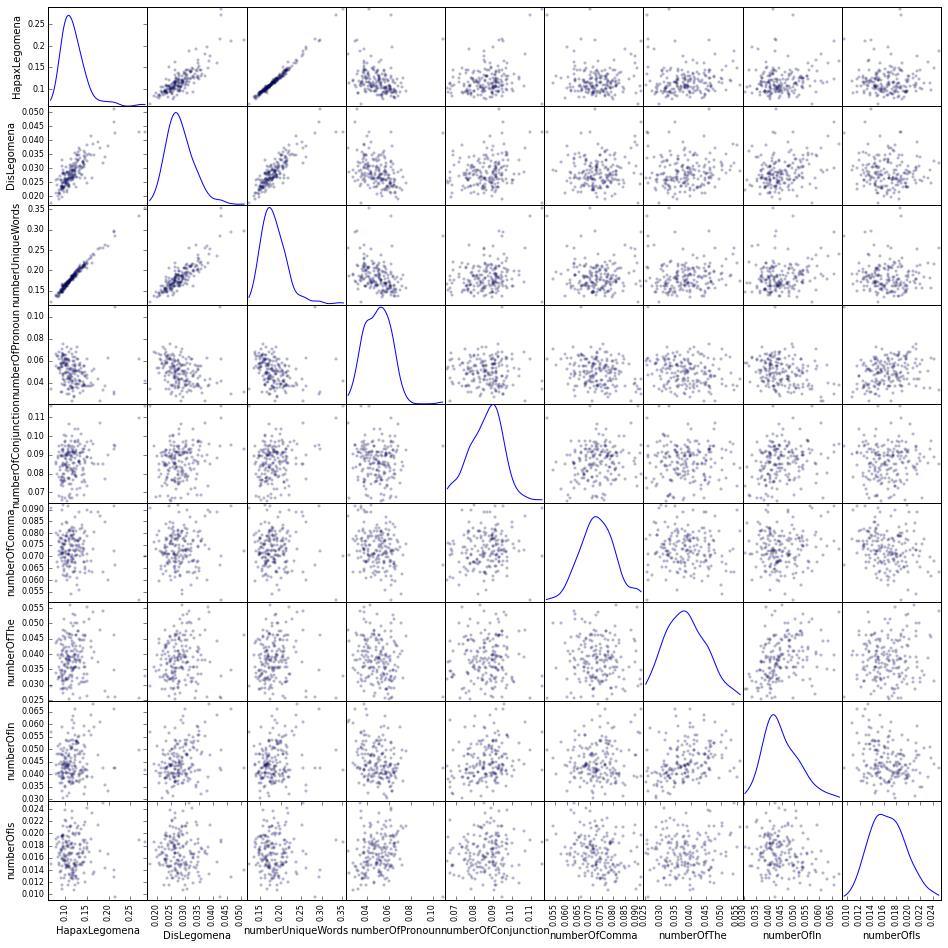

In [99]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [100]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, AgglomerativeClustering, MeanShift, SpectralClustering, DBSCAN, Birch 
import numpy as np

In [102]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True)
    X_tfidf = tfidf_transformer.fit_transform(X_counts)
    return X_tfidf

In [103]:
def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X

    

In [104]:
# Features from n-grams, use fewer components
X_tfidf = getTfidf(ngram_range = (3,5))
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title, 
                         columns=['n-gram 1st component', 'n-gram 2nd compoent', 'n-gram 3rd', 'n-gram 4th', 'n-gram 5th', 'n-gram 6th',])
df_ngrams.head()

Explained variance of the SVD step: 3%


,n-gram 1st component,n-gram 2nd compoent,n-gram 3rd,n-gram 4th,n-gram 5th,n-gram 6th
LOVE'S LABOUR'S LOST ACT V.,0.062094,0.904016,0.067550,0.365742,-0.199563,-0.027283
THE LIFE OF KING HENRY THE FIFTH ACT I.,-0.394682,0.097775,-0.172044,-0.301121,-0.006312,-0.845195
THE TWO GENTLEMEN OF VERONA ACT II.,-0.161633,-0.590293,-0.630361,-0.408382,-0.179246,0.170790
KING HENRY THE EIGHTH ACT IV.,-0.160835,-0.572896,-0.104103,0.317793,-0.415090,-0.601492
SECOND PART OF KING HENRY IV ACT II.,0.397324,0.456089,0.221832,-0.356232,-0.617418,0.277130


## Step 3 Combine n-grams and other features

In [105]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,numberOfPronoun,numberOfConjunction,numberOfComma,numberOfThe,numberOfIn,numberOfIs,n-gram 1st component,n-gram 2nd compoent,n-gram 3rd,n-gram 4th,n-gram 5th,n-gram 6th
act,,,,,,,,,,,,,,,
LOVE'S LABOUR'S LOST ACT V.,0.089181,0.025578,0.148862,0.053884,0.076562,0.077756,0.044590,0.047915,0.017308,0.062094,0.904016,0.067550,0.365742,-0.199563,-0.027283
THE LIFE OF KING HENRY THE FIFTH ACT I.,0.164650,0.038578,0.240797,0.037821,0.095562,0.073374,0.053707,0.068079,0.013364,-0.394682,0.097775,-0.172044,-0.301121,-0.006312,-0.845195
THE TWO GENTLEMEN OF VERONA ACT II.,0.091991,0.023506,0.147998,0.061956,0.089234,0.077481,0.032937,0.039756,0.019588,-0.161633,-0.590293,-0.630361,-0.408382,-0.179246,0.170790
KING HENRY THE EIGHTH ACT IV.,0.176306,0.039179,0.251866,0.043377,0.084888,0.089086,0.037313,0.047575,0.021455,-0.160835,-0.572896,-0.104103,0.317793,-0.415090,-0.601492
SECOND PART OF KING HENRY IV ACT II.,0.090692,0.023723,0.151986,0.058002,0.073893,0.074120,0.043246,0.038706,0.012713,0.397324,0.456089,0.221832,-0.356232,-0.617418,0.277130


## Step 4 Clustering

In [106]:
def getLabels(X, n_clusters = 8, method = 'KMeans'):
    
    if method == 'KMeans':
        cluster = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, 
                         n_init=5, random_state = randomState)   
    elif method == 'AffinityPropagation':
        cluster = AffinityPropagation(max_iter=1000)
    elif method == 'AgglomerativeClustering':
        cluster = AgglomerativeClustering(n_clusters=n_clusters)
    elif method == 'Birch':
        cluster = Birch()
    elif method == 'DBSCAN':
        cluster = DBSCAN(random_state = randomState, eps=0.1, min_samples=3)
    elif method == 'SpectralClustering':
        cluster = SpectralClustering(n_clusters=n_clusters)
    elif method == 'MeanShift':
        cluster = MeanShift()
        

    return cluster.fit_predict(X)
        

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')
        
def print2D(X, x_label, y_label, title, labels, n_labels):
    plt.figure(figsize = (9,7))
    plt.scatter(X[:,0], X[:,1], c=labels, marker='+', s=100, linewidths=2)
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    ax = plt.gca()
    for i in range(len(labels)):
        if labels.tolist().count(labels[i]) <= n_labels:
            ax.annotate(df_all.index[i], xy=X[i,:], fontweight='bold')
    
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    
    xrange = xmax - xmin
    yrange = ymax - ymin
    
    xmin = xmin - xrange/10
    xmax = xmax + xrange/10
    
    ymin = ymin - yrange/10
    ymax = ymax + yrange/10
    
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.show()  

In [107]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
from sklearn.manifold import MDS

def clusterDocuments(X, scaled = False, PCA_X = False, n_clusters = 8, 
                     method = 'KMeans', visualize = 'PCA', verbose = True, n_labels = 3):
        
    
    if scaled:
        X = preprocessing.scale(X)
        
    if PCA_X:
        X = PCA().fit_transform(X)
        
    if PCA_X:
        X_2D_PCA = X[:, 0:2]
    else: 
        X_2D_PCA = PCA(n_components=2).fit_transform(X)
        X_2D_MDS = MDS(n_components=2).fit_transform(X)
        
    labels = getLabels(X, n_clusters, method)
        
    if visualize == 'PCA':
        print2D(X_2D_PCA, 'PCA 1st component', 'PCA 2nd component', method, labels, n_labels)
    elif visualize == 'MDS':
        print2D(X_2D_MDS, 'MDS 1st component', 'MDS 2nd component', method, labels, n_labels)
        
    
    print('Number of clusters: ', len(set(labels)))
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, random_state=randomState))
    
    if verbose:
        printClusters(labels)

def visualizeCovariance(X, scaled = False):
    if scaled:
        X = preprocessing.scale(X)
        title = 'Standardized'
    else:
        title = 'Non-Standardized'
    
    pca = PCA(n_components=None)
    pca.fit(X)
    
    covariance = pca.get_covariance()
    
    
    width = 0.5
    ind = np.arange(len(pca.explained_variance_ratio_))

    plt.figure()
    ax = plt.gca()
    ax.bar(ind, pca.explained_variance_ratio_, width, color='gray')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Components')
    plt.title(title, fontweight='bold')
    plt.show()
    
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(covariance, cmap=plt.cm.Blues, alpha=0.8)
    # Format
    fig = plt.gcf()
    fig.set_size_inches(8, 8)
    # turn off the frame
    ax.set_frame_on(False)
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(covariance.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(covariance.shape[1]) + 0.5, minor=False)
    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    # Set the labels
    # label source:https://en.wikipedia.org/wiki/Basketball_statistics
    labels = df_all.columns
    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(labels, minor=False)
    ax.set_yticklabels(labels, minor=False)
    # rotate the
    plt.xticks(rotation=90)
    ax.grid(False)
    # Turn off all the ticks
    ax = plt.gca()
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    plt.title(title, fontweight='bold', y=0)
    plt.show()
    

Explained variance of the SVD step: 39%


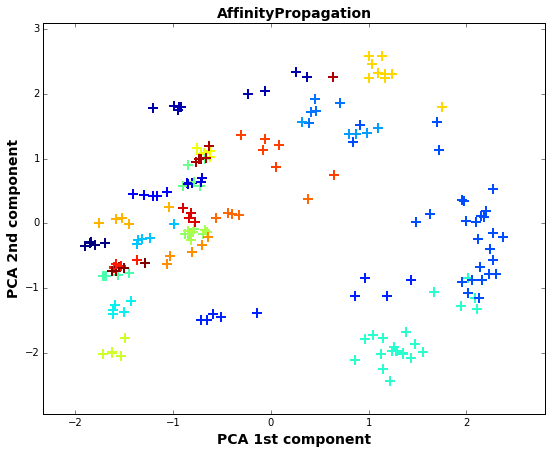

Number of clusters:  26
Silhouette Coefficient: 0.683
[2, 49, 87, 89, 147]
['THE TWO GENTLEMEN OF VERONA ACT II.'
 'THE TWO GENTLEMEN OF VERONA ACT III'
 'THE TWO GENTLEMEN OF VERONA ACT I. '
 'THE TWO GENTLEMEN OF VERONA ACT V. '
 'THE TWO GENTLEMEN OF VERONA ACT IV.']


[10, 12, 15, 97, 100, 116, 124, 149, 159]
["A MIDSUMMER NIGHT'S DREAM ACT IV." 'ALLS WELL THAT ENDS WELL ACT III'
 'ALLS WELL THAT ENDS WELL ACT II.' "A MIDSUMMER NIGHT'S DREAM ACT I. "
 "A MIDSUMMER NIGHT'S DREAM ACT III" "A MIDSUMMER NIGHT'S DREAM ACT V. "
 'ALLS WELL THAT ENDS WELL ACT I. ' 'ALLS WELL THAT ENDS WELL ACT V. '
 "A MIDSUMMER NIGHT'S DREAM ACT II."]


[13, 70, 85, 88, 120]
['THE TEMPEST ACT III' 'THE TEMPEST ACT I. ' 'THE TEMPEST ACT IV.'
 'THE TEMPEST ACT II.' 'THE TEMPEST ACT V. ']


[18, 46, 56, 58, 143]
['THE TRAGEDY OF MACBETH ACT I. ' 'THE TRAGEDY OF MACBETH ACT II.'
 'THE TRAGEDY OF MACBETH ACT IV.' 'THE TRAGEDY OF MACBETH ACT III'
 'THE TRAGEDY OF MACBETH ACT V. ']


[4, 8, 23, 112, 130, 131, 1

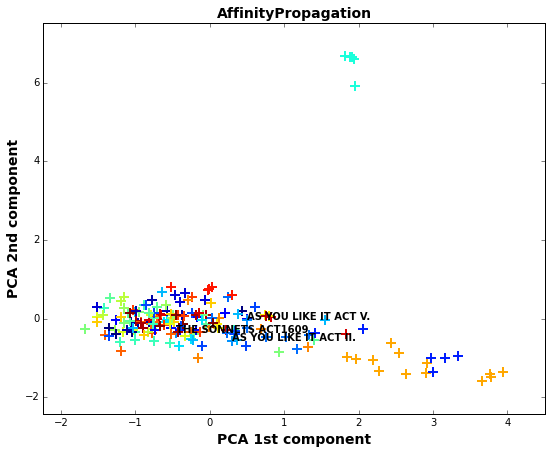

Number of clusters:  27
Silhouette Coefficient: 0.177
[0, 17, 133, 142]
["LOVE'S LABOUR'S LOST ACT V. "
 'THE HISTORY OF TROILUS AND CRESSIDA ACT V. '
 "LOVE'S LABOUR'S LOST ACT IV." "LOVE'S LABOUR'S LOST ACT II."]


[5, 19, 69, 79, 96, 115, 167, 181]
['CYMBELINE ACT I. ' "THE WINTER'S TALE ACT IV." 'CYMBELINE ACT II.'
 'THE TRAGEDY OF KING LEAR ACT V. ' 'MEASURE FOR MEASURE ACT I. '
 "THE WINTER'S TALE ACT I. " 'THE MERCHANT OF VENICE ACT V. '
 'THE TRAGEDY OF JULIUS CAESAR ACT III']


[8, 23, 112, 157, 177]
['THE MERRY WIVES OF WINDSOR ACT III' 'THE MERRY WIVES OF WINDSOR ACT I. '
 'THE MERRY WIVES OF WINDSOR ACT V. ' 'THE MERRY WIVES OF WINDSOR ACT II.'
 'THE MERRY WIVES OF WINDSOR ACT IV.']


[7, 9, 16, 47, 65, 68, 82, 94, 144]
['THE TAMING OF THE SHREW ACT V. '
 'THE TRAGEDY OF TITUS ANDRONICUS ACT IV.'
 'THE TAMING OF THE SHREW ACT IV.' 'MEASURE FOR MEASURE ACT II.'
 "A LOVER'S COMPLAINT ACT1609" 'SECOND PART OF KING HENRY IV ACT IV.'
 'THE TRAGEDY OF ROMEO AND JULIET ACT III'
 '

In [108]:
# Cluster only using n-grams as features
X_tfidf = getTfidf(ngram_range = (1,1))
X = getSVD(X_tfidf, n_components = 20)
clusterDocuments(X, scaled = True, PCA_X = True, method = 'AffinityPropagation')

X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 20)
clusterDocuments(X, scaled = True, PCA_X = True, method = 'AffinityPropagation')

Explained variance of the SVD step: 10%


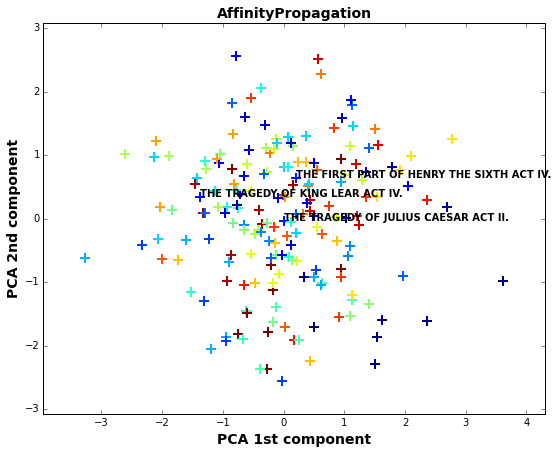

Number of clusters:  28
Silhouette Coefficient: 0.048
[8, 47, 78, 112, 116, 176, 177]
['THE MERRY WIVES OF WINDSOR ACT III' 'MEASURE FOR MEASURE ACT II.'
 'KING JOHN ACT I. ' 'THE MERRY WIVES OF WINDSOR ACT V. '
 "A MIDSUMMER NIGHT'S DREAM ACT V. "
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT IV.'
 'THE MERRY WIVES OF WINDSOR ACT IV.']


[12, 16, 17, 127, 146, 156, 163]
['ALLS WELL THAT ENDS WELL ACT III' 'THE TAMING OF THE SHREW ACT IV.'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT V. '
 'THE TRAGEDY OF CORIOLANUS ACT V. '
 'THE FIRST PART OF KING HENRY THE FOURTH ACT IV.'
 'TWELFTH NIGHT; OR, WHAT YOU WILL ACT I. '
 'THE MERCHANT OF VENICE ACT I. ']


[4, 21, 31, 49, 97, 126, 133, 147, 161]
['SECOND PART OF KING HENRY IV ACT II.' 'KING RICHARD III ACT V. '
 'THE HISTORY OF TROILUS AND CRESSIDA ACT III'
 'THE TWO GENTLEMEN OF VERONA ACT III' "A MIDSUMMER NIGHT'S DREAM ACT I. "
 'THE LIFE OF TIMON OF ATHENS ACT II.' "LOVE'S LABOUR'S LOST ACT IV."
 'THE TWO GENTLEMEN OF VERONA ACT IV.'
 

In [109]:
X_tfidf = getTfidf(ngram_range = (3,5))
X = getSVD(X_tfidf, n_components = 20)
clusterDocuments(X, scaled = True, PCA_X = True, method = 'AffinityPropagation')

> By only using n-grams + td-idf + SVD (20 components), acts are grouped mainly according to their topics. Acts of the same play go to the same cluster.

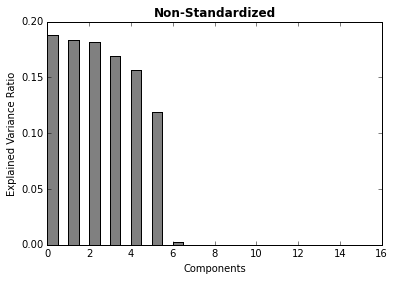

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


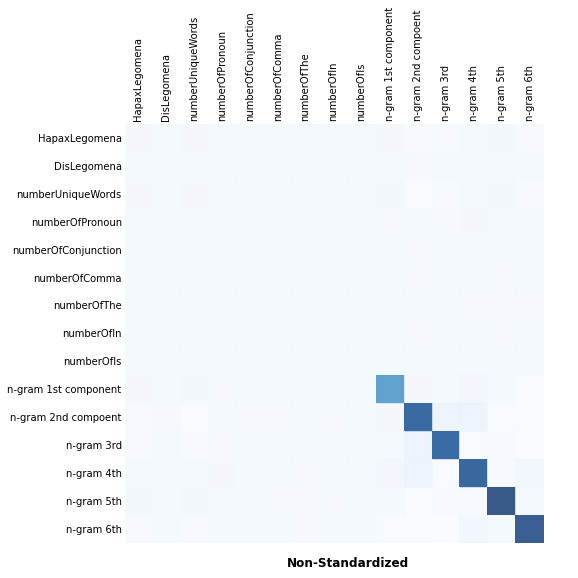

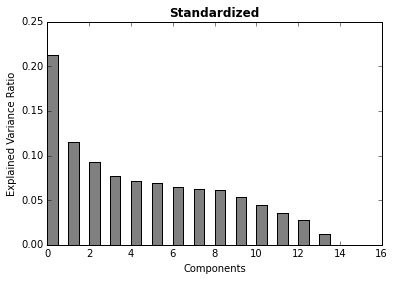

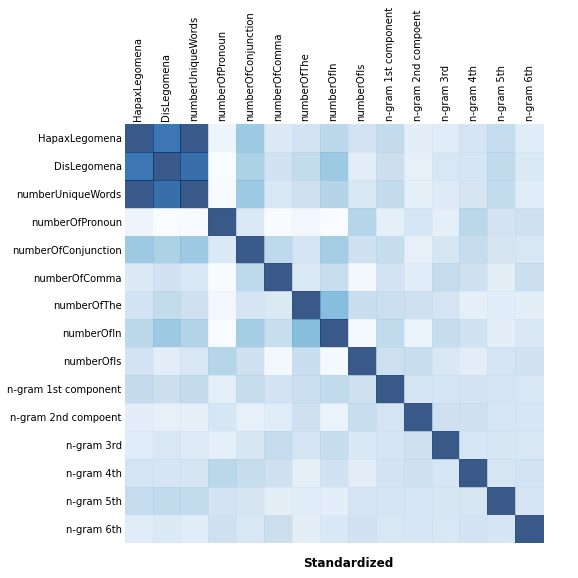

In [110]:
X = df_all.values
visualizeCovariance(X, scaled = False)
visualizeCovariance(X, scaled = True)

### K-Means

In [111]:
# Cluster using all features
X = df_all.values
for n in np.arange(2,30,1):
    clusterDocuments(X, scaled=True, PCA_X = True, n_clusters = n, method = 'KMeans', visualize = 'None', verbose = False)

Number of clusters:  2
Silhouette Coefficient: 0.120
Number of clusters:  3
Silhouette Coefficient: 0.073
Number of clusters:  4
Silhouette Coefficient: 0.067
Number of clusters:  5
Silhouette Coefficient: 0.072
Number of clusters:  6
Silhouette Coefficient: 0.084
Number of clusters:  7
Silhouette Coefficient: 0.091
Number of clusters:  8
Silhouette Coefficient: 0.086
Number of clusters:  9
Silhouette Coefficient: 0.078
Number of clusters:  10
Silhouette Coefficient: 0.091
Number of clusters:  11
Silhouette Coefficient: 0.087
Number of clusters:  12
Silhouette Coefficient: 0.085
Number of clusters:  13
Silhouette Coefficient: 0.087
Number of clusters:  14
Silhouette Coefficient: 0.082
Number of clusters:  15
Silhouette Coefficient: 0.099
Number of clusters:  16
Silhouette Coefficient: 0.086
Number of clusters:  17
Silhouette Coefficient: 0.090
Number of clusters:  18
Silhouette Coefficient: 0.084
Number of clusters:  19
Silhouette Coefficient: 0.093
Number of clusters:  20
Silhouette C

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


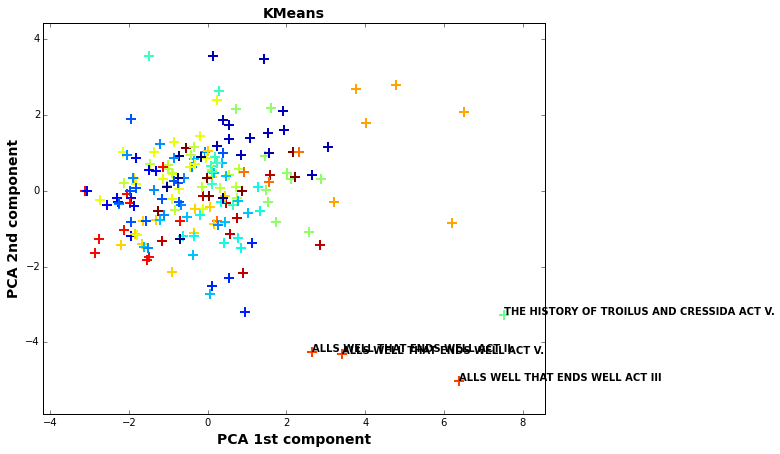

Number of clusters:  20
Silhouette Coefficient: 0.080
[60, 88, 130, 133, 150, 152]
['THE SECOND PART OF KING HENRY THE SIXTH ACT IV.' 'THE TEMPEST ACT II.'
 'SECOND PART OF KING HENRY IV ACT III' "LOVE'S LABOUR'S LOST ACT IV."
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT V. ' 'KING JOHN ACT IV.']


[22, 25, 29, 31, 43, 57, 61, 83, 97, 110, 117, 119, 123, 146]
['KING HENRY THE EIGHTH ACT III'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT I. '
 'THE FIRST PART OF HENRY THE SIXTH ACT V. '
 'THE HISTORY OF TROILUS AND CRESSIDA ACT III'
 'THE FIRST PART OF HENRY THE SIXTH ACT III' 'THE COMEDY OF ERRORS ACT III'
 'KING RICHARD THE SECOND ACT I. '
 'THE FIRST PART OF HENRY THE SIXTH ACT IV.'
 "A MIDSUMMER NIGHT'S DREAM ACT I. "
 'THE LIFE OF KING HENRY THE FIFTH ACT II.'
 'THE TRAGEDY OF TITUS ANDRONICUS ACT 1. '
 'KING RICHARD THE SECOND ACT III'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT III'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT IV.']


[0, 47, 54, 91, 139, 148, 153, 155, 157,

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [112]:
X = df_all.values
clusterDocuments(X, scaled = True, PCA_X = True, n_clusters = 20, method = 'KMeans', visualize = 'PCA', verbose = True)

> By adding the features of average sentence length, number of unique words normalized by total number of words, fequency of conjunctions, and etc., acts are clustered according to the writing style (need to be verified by visualization).

### Affinity Propagation

In [113]:
print('No mormalization')
clusterDocuments(X, scaled = False, PCA_X=False, method = 'AffinityPropagation', visualize = 'None', verbose = False)
print('Normalize to N(0,1)')
clusterDocuments(X, scaled = True, method = 'AffinityPropagation', visualize = 'None', verbose = False)

No mormalization
Number of clusters:  21
Silhouette Coefficient: 0.194
Normalize to N(0,1)
Number of clusters:  24
Silhouette Coefficient: 0.072


/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


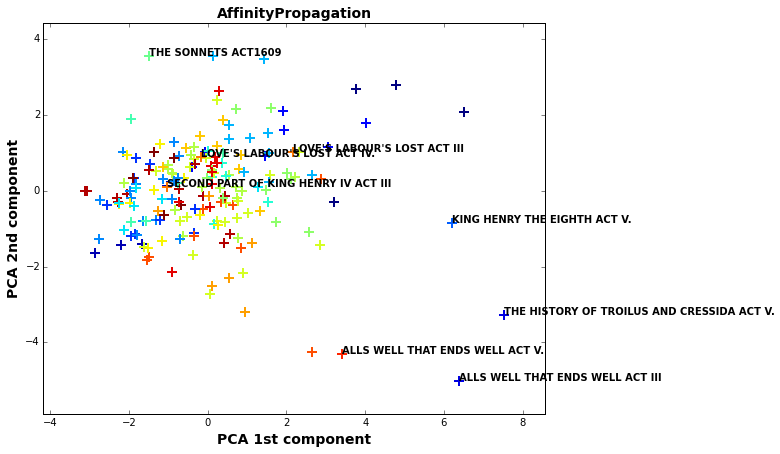

Number of clusters:  24
Silhouette Coefficient: 0.072
[3, 6, 48, 65]
['KING HENRY THE EIGHTH ACT IV.' 'THE COMEDY OF ERRORS ACT I. '
 'THE HISTORY OF TROILUS AND CRESSIDA ACT I. '
 "A LOVER'S COMPLAINT ACT1609"]


[7, 23, 73, 118]
['THE TAMING OF THE SHREW ACT V. ' 'THE MERRY WIVES OF WINDSOR ACT I. '
 'THE TRAGEDY OF JULIUS CAESAR ACT V. '
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT V. ']


[12, 17]
['ALLS WELL THAT ENDS WELL ACT III'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT V. ']


[1, 18, 20, 25, 43, 52, 146]
['THE LIFE OF KING HENRY THE FIFTH ACT I. '
 'THE TRAGEDY OF MACBETH ACT I. ' 'CYMBELINE ACT III'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT I. '
 'THE FIRST PART OF HENRY THE SIXTH ACT III'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT V. '
 'THE FIRST PART OF KING HENRY THE FOURTH ACT IV.']


[0, 19, 42, 47, 91, 101, 122, 129, 154]
["LOVE'S LABOUR'S LOST ACT V. " "THE WINTER'S TALE ACT IV."
 'THE TRAGEDY OF JULIUS CAESAR ACT I. ' 'MEASURE FOR MEASURE ACT II.'
 'THE TRAGE

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [114]:
clusterDocuments(X, scaled = True, PCA_X = True, method = 'AffinityPropagation')

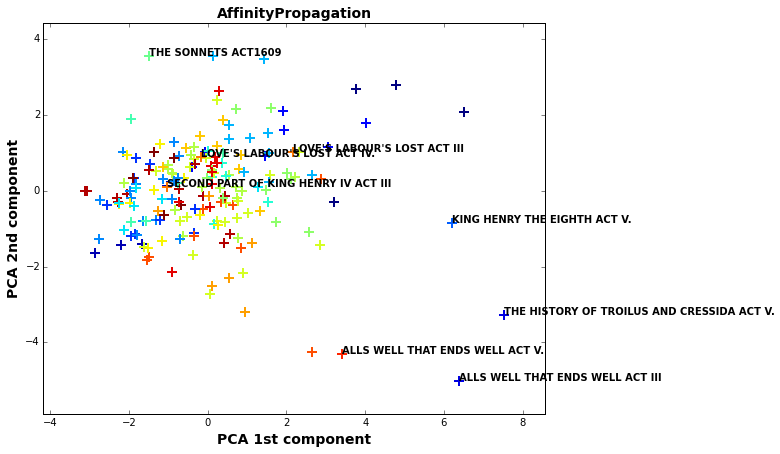

Number of clusters:  24
Silhouette Coefficient: 0.072


/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


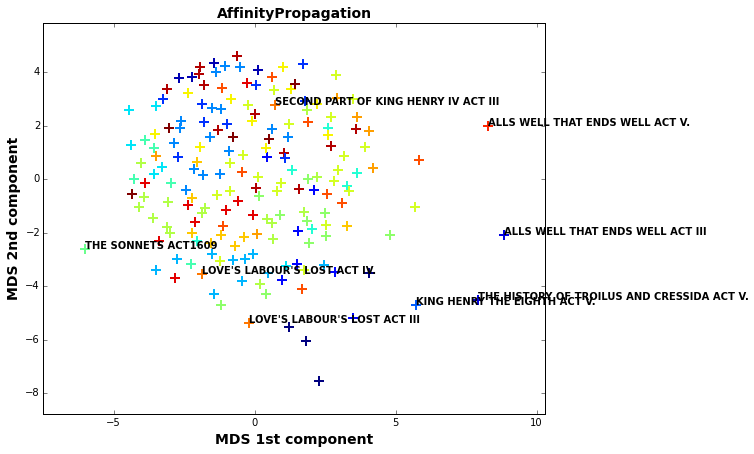

Number of clusters:  24
Silhouette Coefficient: 0.072


In [115]:
clusterDocuments(X, scaled = True, method = 'AffinityPropagation', visualize = 'PCA', verbose = False)
clusterDocuments(X, scaled = True, method = 'AffinityPropagation', visualize = 'MDS', verbose = False)

In [116]:
X = df_all.values
for n in np.arange(2,30,1):
    clusterDocuments(X, scaled=True, PCA_X = True, n_clusters = n, method = 'AgglomerativeClustering', visualize = False, verbose = False)
    

Number of clusters:  2
Silhouette Coefficient: 0.082
Number of clusters:  3
Silhouette Coefficient: 0.085
Number of clusters:  4
Silhouette Coefficient: 0.050
Number of clusters:  5
Silhouette Coefficient: 0.058
Number of clusters:  6
Silhouette Coefficient: 0.060
Number of clusters:  7
Silhouette Coefficient: 0.058
Number of clusters:  8
Silhouette Coefficient: 0.063
Number of clusters:  9
Silhouette Coefficient: 0.072
Number of clusters:  10
Silhouette Coefficient: 0.075
Number of clusters:  11
Silhouette Coefficient: 0.081
Number of clusters:  12
Silhouette Coefficient: 0.081
Number of clusters:  13
Silhouette Coefficient: 0.086
Number of clusters:  14
Silhouette Coefficient: 0.084
Number of clusters:  15
Silhouette Coefficient: 0.085
Number of clusters:  16
Silhouette Coefficient: 0.087
Number of clusters:  17
Silhouette Coefficient: 0.087
Number of clusters:  18
Silhouette Coefficient: 0.087
Number of clusters:  19
Silhouette Coefficient: 0.089
Number of clusters:  20
Silhouette C

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


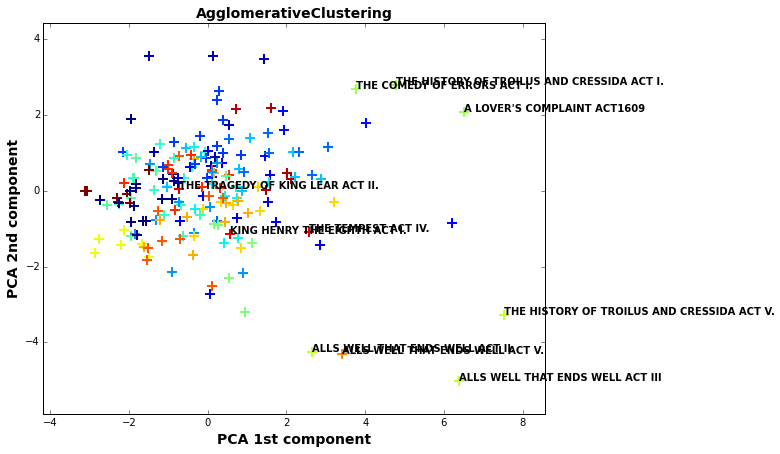

Number of clusters:  23
Silhouette Coefficient: 0.098
[2, 28, 30, 34, 41, 74, 81, 86, 108, 127, 132, 135, 144, 148, 158, 176, 181]
['THE TWO GENTLEMEN OF VERONA ACT II.' 'THE TRAGEDY OF CORIOLANUS ACT III'
 'CYMBELINE ACT V. ' 'MUCH ADO ABOUT NOTHING ACT IV.'
 'THE TRAGEDY OF JULIUS CAESAR ACT II.'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT III'
 'MUCH ADO ABOUT NOTHING ACT II.'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT I. '
 'KING RICHARD III ACT I. ' 'THE TRAGEDY OF CORIOLANUS ACT V. '
 'THE TRAGEDY OF CORIOLANUS ACT IV.'
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT III'
 'MEASURE FOR MEASURE ACT V. ' 'AS YOU LIKE IT ACT V. '
 'THE TRAGEDY OF ROMEO AND JULIET ACT II.'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT IV.'
 'THE TRAGEDY OF JULIUS CAESAR ACT III']


[39, 45, 57, 61, 98, 114, 117]
['THE COMEDY OF ERRORS ACT IV.' 'THE SONNETS ACT1609'
 'THE COMEDY OF ERRORS ACT III' 'KING RICHARD THE SECOND ACT I. '
 'THE COMEDY OF ERRORS ACT Il.' 'THE COMEDY OF ERRORS ACT V. '
 'T

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [117]:
clusterDocuments(X, n_clusters = 23, scaled = True, PCA_X = True, method = 'AgglomerativeClustering')

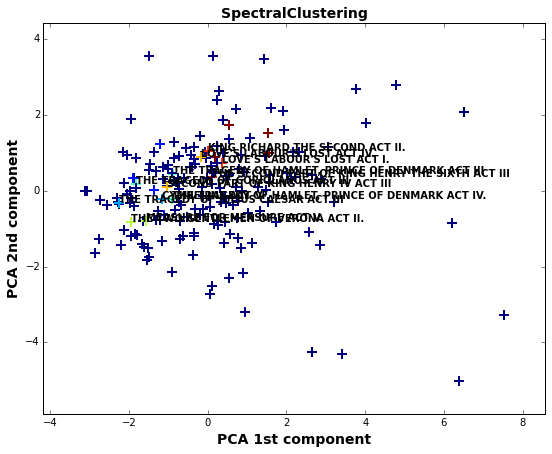

Number of clusters:  8
Silhouette Coefficient: -0.170


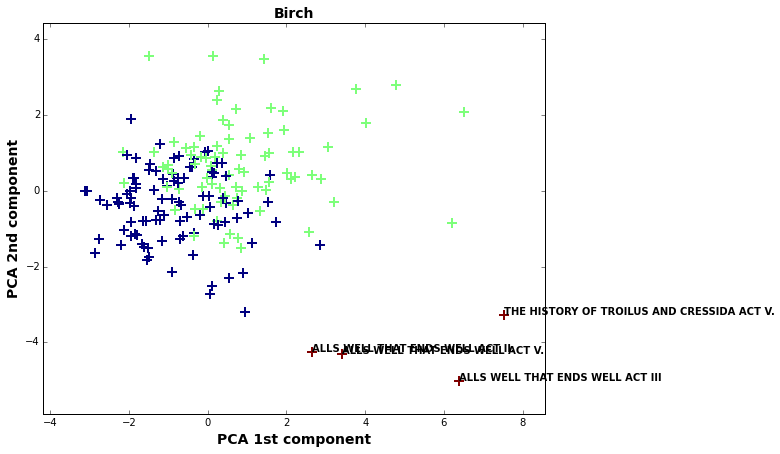

Number of clusters:  3
Silhouette Coefficient: 0.085


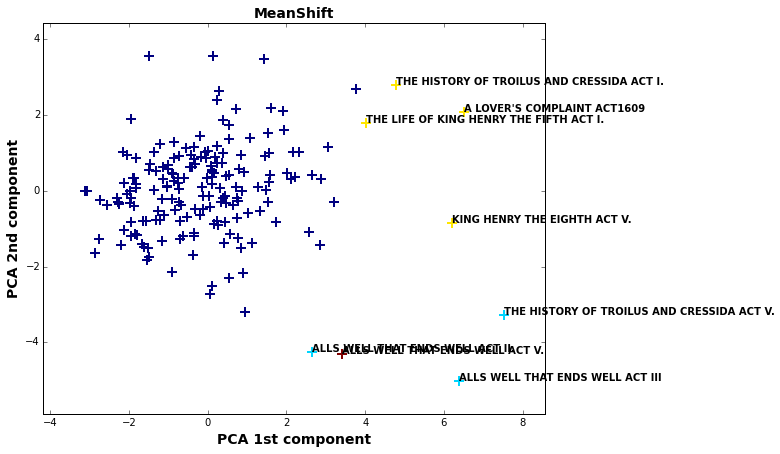

Number of clusters:  4
Silhouette Coefficient: 0.316


/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [118]:
clusterDocuments(X, n_clusters = 8, scaled = True, PCA_X = True, method = 'SpectralClustering', verbose = False)
clusterDocuments(X, scaled = True, PCA_X = True, method = 'Birch', verbose = False, n_labels = 4)
#clusterDocuments(X, scaled = True, PCA_X = True, method = 'DBSCAN')
clusterDocuments(X, scaled = True, PCA_X = True, method = 'MeanShift', verbose = False, n_labels = 4)
